In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv(r"C:\Users\Vanshika Bisht\Downloads\test.csv")

In [32]:
df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [33]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [40]:
df['label']= df['label'].replace(0,'sadness')
df['label']= df['label'].replace(1,'joy')
df['label']= df['label'].replace(2,'love')
df['label']= df['label'].replace(3,'anger')
df['label']= df['label'].replace(4,'fear')
df['label']= df['label'].replace(5,'confused')

In [41]:
df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,sadness
4,i was feeling a little vain when i did this one,sadness


In [42]:
df['label'].value_counts()

label
sadness     1276
love         275
anger        224
joy          159
confused      66
Name: count, dtype: int64

In [43]:
import nltk

In [45]:
df['num_chr']=df["text"].apply(len)

In [46]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<Axes: xlabel='num_chr', ylabel='Count'>

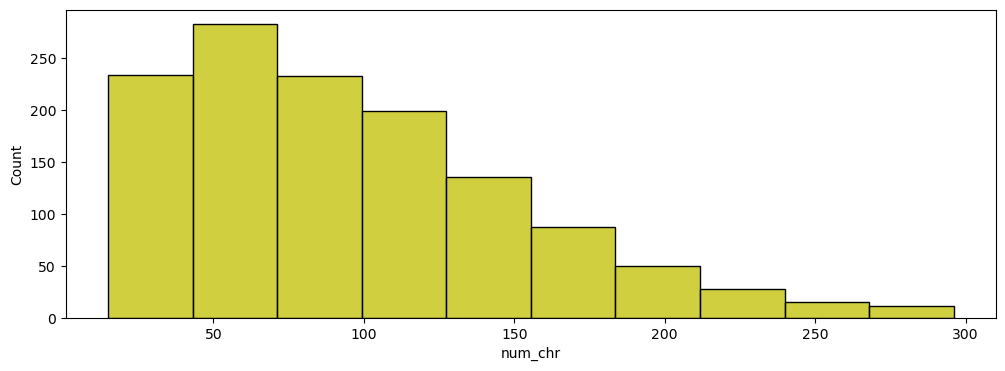

In [47]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['label']=='sadness']['num_chr'],color='y',bins=10)

<Axes: xlabel='num_chr', ylabel='Count'>

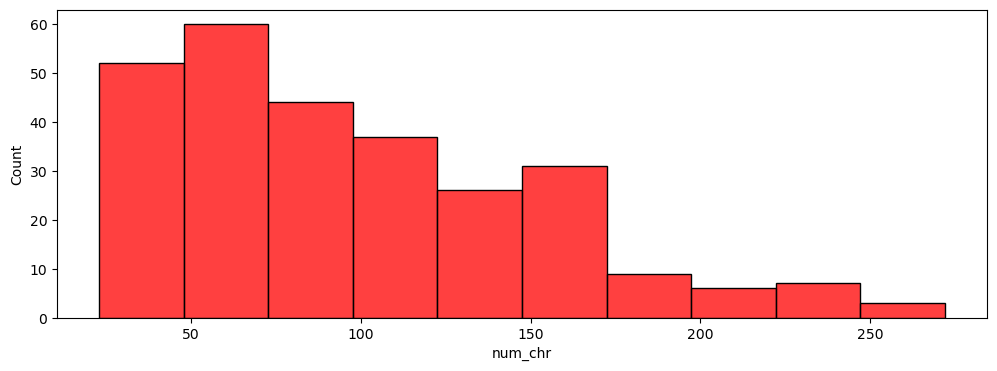

In [49]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['label']=='love']['num_chr'],color='r',bins=10)

<Axes: xlabel='num_chr', ylabel='Count'>

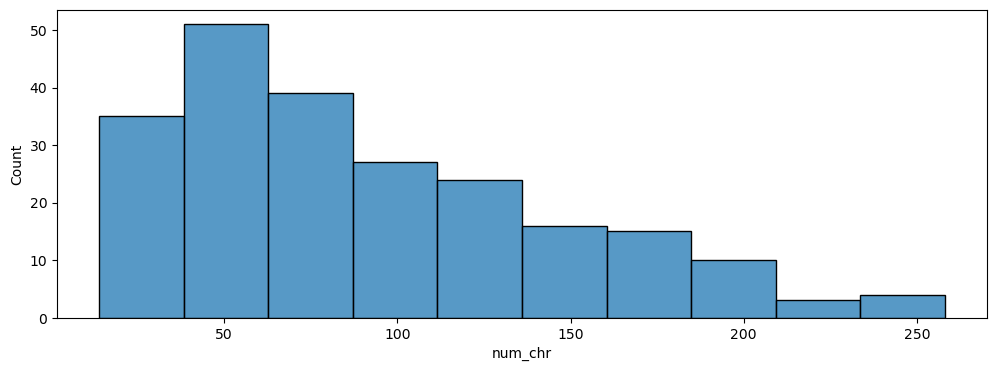

In [51]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['label']=='anger']['num_chr'],bins=10)

<Axes: xlabel='num_chr', ylabel='Count'>

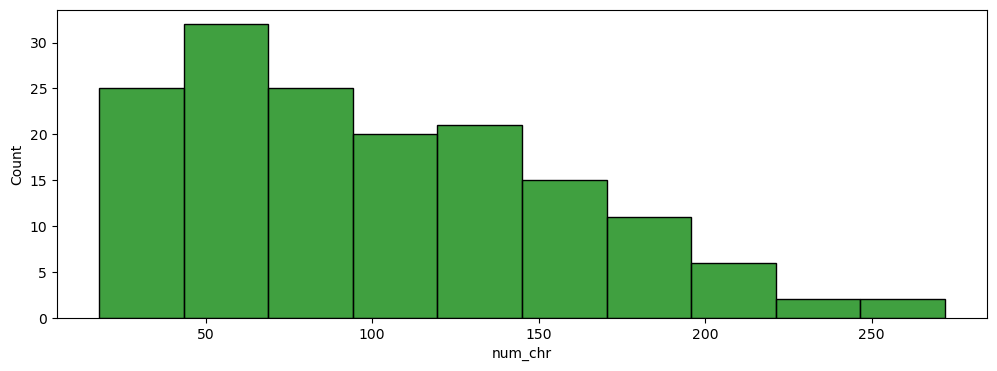

In [52]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['label']=='joy']['num_chr'],color='g',bins=10)

<Axes: xlabel='num_chr', ylabel='Count'>

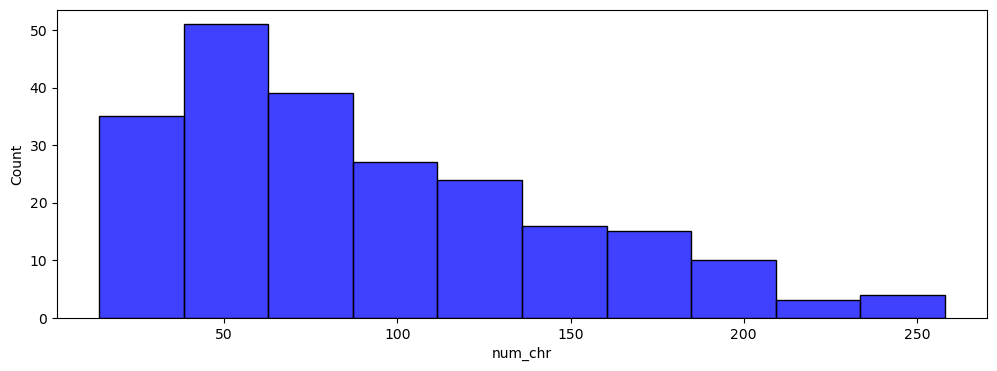

In [54]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['label']=='anger']['num_chr'],color='b',bins=10)

<Axes: xlabel='num_chr', ylabel='Count'>

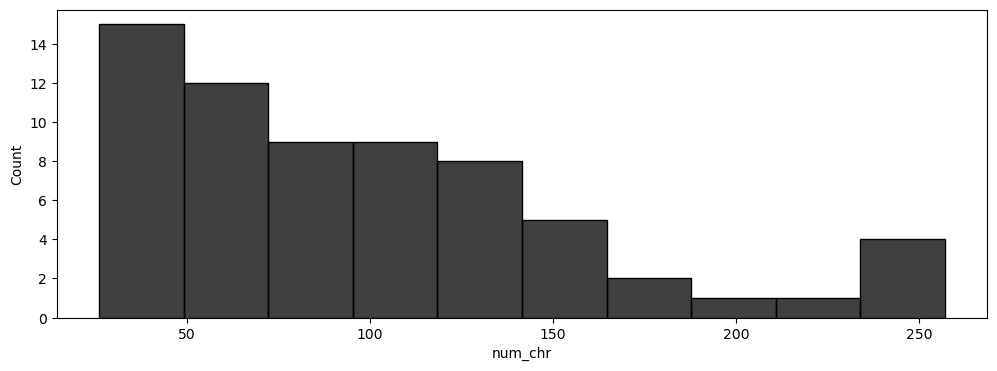

In [56]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['label']=='confused']['num_chr'],color='black',bins=10)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.3,random_state=5)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [60]:
classifier = Pipeline([('tfidf' , TfidfVectorizer()), ('classifer' , RandomForestClassifier(n_estimators=100))])

In [61]:
classifier.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifer', RandomForestClassifier())])

In [62]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [63]:
def acc(y_pred , y_test):
  print(accuracy_score(y_pred , y_test))
  print(classification_report(y_pred , y_test))
  print(confusion_matrix(y_pred , y_test))

In [64]:
y_pre = classifier.predict(x_test)

In [65]:
acc(y_pre , y_test)

0.7366666666666667
              precision    recall  f1-score   support

       anger       0.37      0.81      0.50        32
    confused       0.21      0.80      0.33         5
         joy       0.13      0.75      0.22         8
        love       0.29      0.81      0.43        27
     sadness       0.99      0.73      0.84       528

    accuracy                           0.74       600
   macro avg       0.40      0.78      0.47       600
weighted avg       0.90      0.74      0.79       600

[[ 26   1   0   4   1]
 [  1   4   0   0   0]
 [  0   0   6   0   2]
 [  1   1   1  22   2]
 [ 43  13  39  49 384]]


In [70]:
classifier.predict(['i am feeling sad.'])

array(['sadness'], dtype=object)